Group: Noah Little, Zach Healy, Jack Stout, Jacob Thieret, Justin Kehoe, Collyn Rouggly, Momoh Brema

#### 1. Create a grid of scatter plots with each one representing the sq_ft distribution in a single zipcode, please also include ticks, labels and legend in your plot

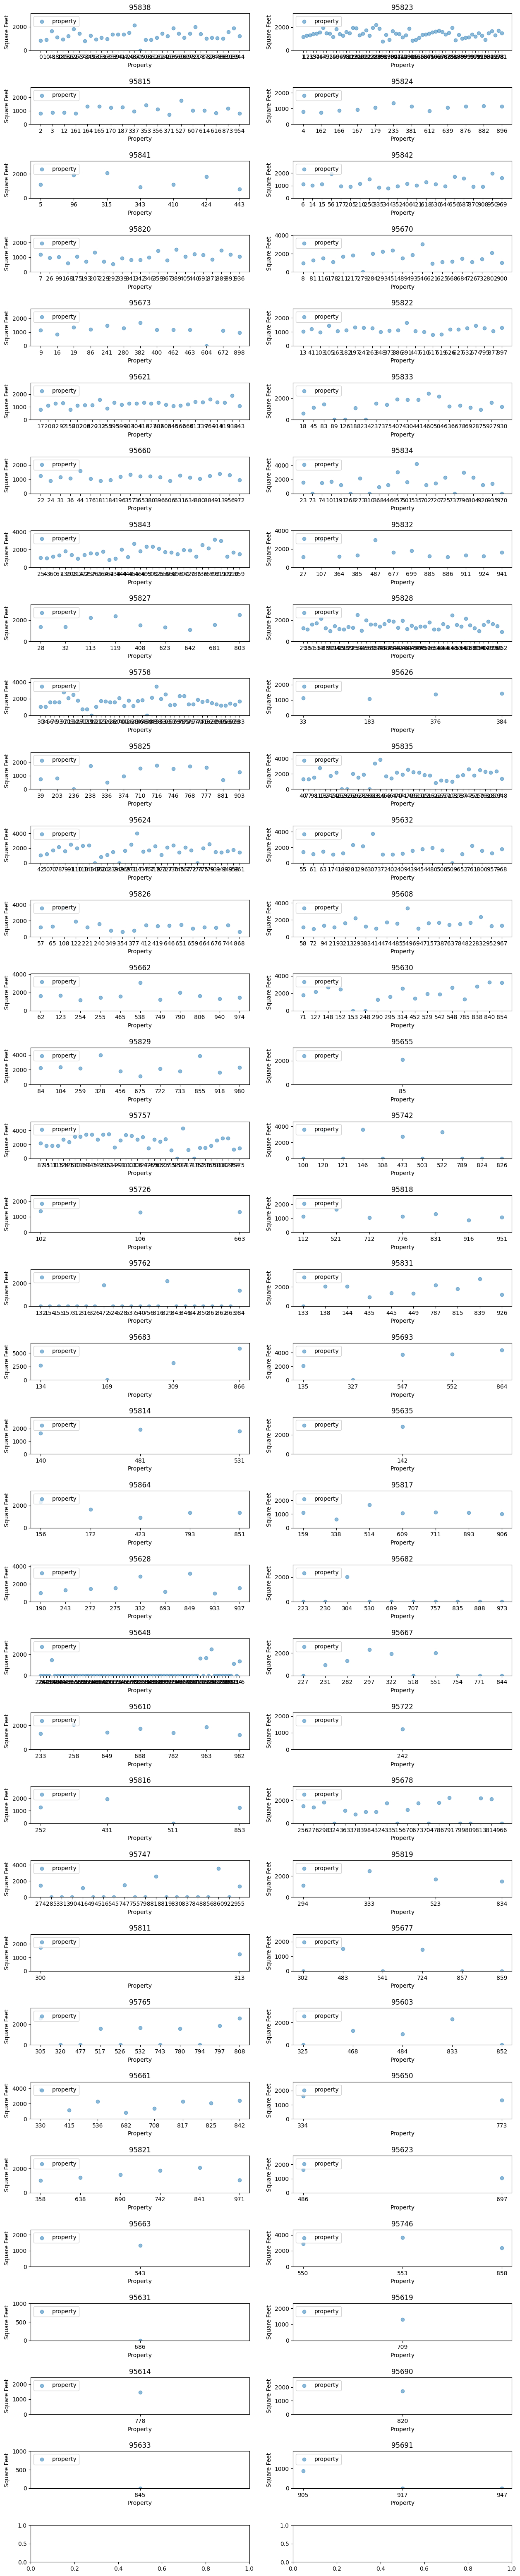

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Sacramentorealestatetransactions.csv')
zips = df['zip'].unique()

fig, axs = plt.subplots(int(len(zips)/2 + 1), 2, figsize=(15, 80))
axs = axs.reshape(-1)

for i, zip in enumerate(zips):
    # Get the current zips data
    data = df[df['zip'] == zip]
    ft = data['sq__ft']
    
    axs[i].scatter(range(len(ft)), ft, alpha=0.5)
    axs[i].set_title(zip)
    axs[i].set_ylim([0, max(ft)+1000])
    axs[i].set_xlabel("Property")
    axs[i].set_ylabel("Square Feet")
    axs[i].legend(['property'], loc="upper left")
    
    axs[i].set_xticks(range(len(ft)))
    axs[i].set_xticklabels(data.index)
    
plt.subplots_adjust(hspace=1)
plt.show()

#### 2. Create a grid of scatter plots with each one representing the price distribution in a single zipcode, annotate the highest and lowest price ones for each category of real estate: condo, residential and multi-family, please also include ticks, labels and legend in your plot


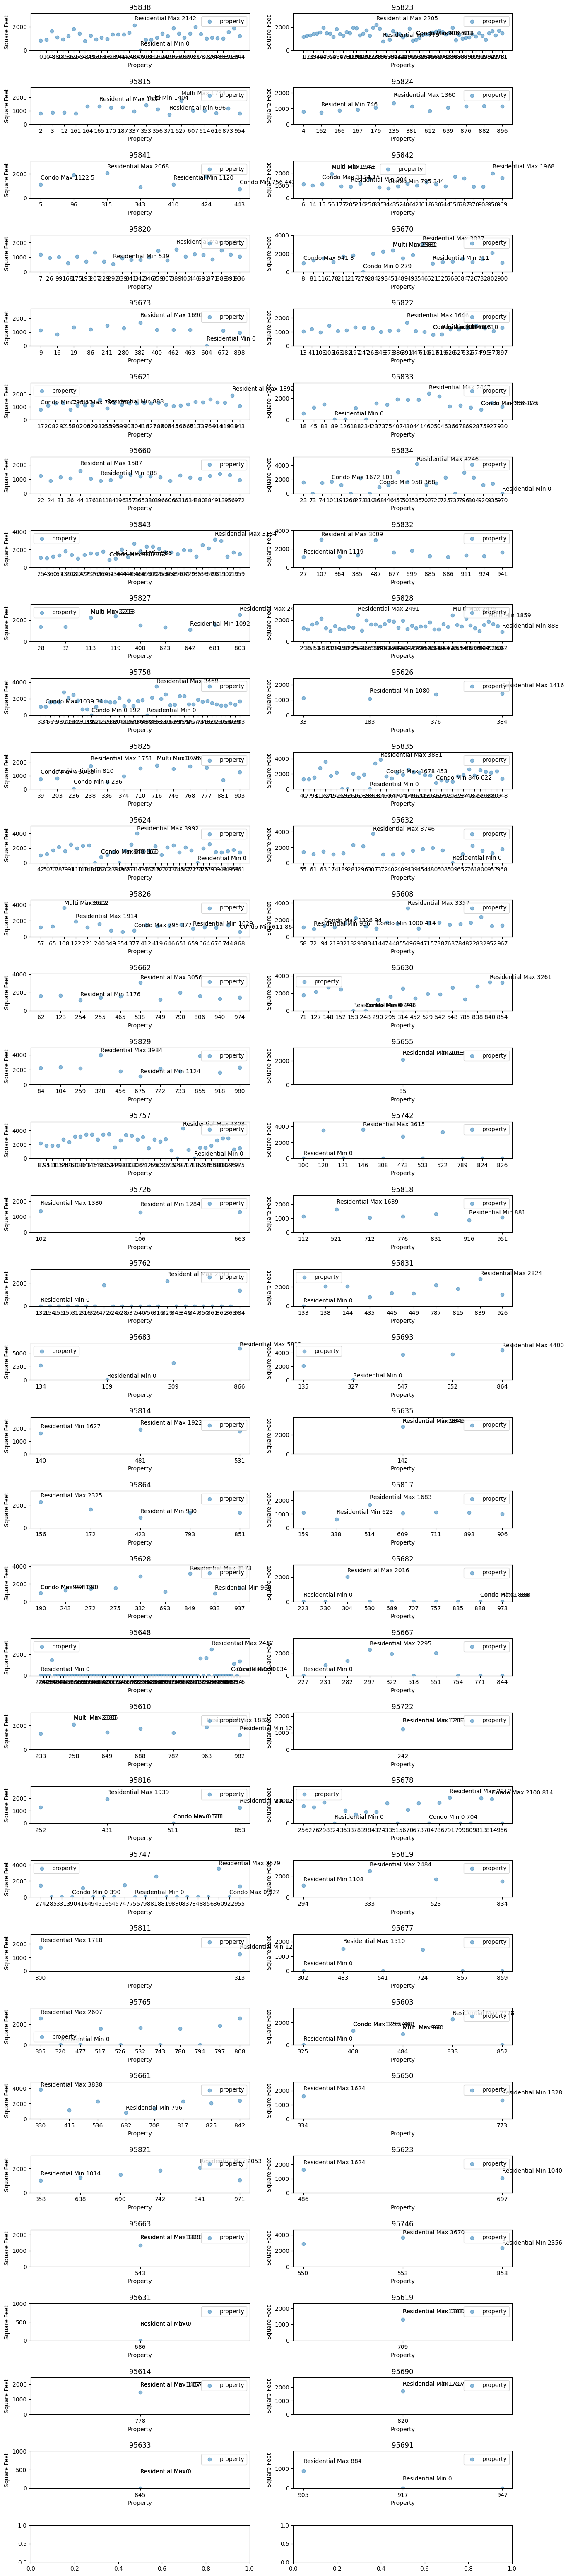

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Sacramentorealestatetransactions.csv')
zips = df['zip'].unique()

fig, axs = plt.subplots(int(len(zips)/2 + 1), 2, figsize=(15, 80))
axs = axs.reshape(-1)

for i, zip in enumerate(zips):
    # Get the current zips data
    data = df[df['zip'] == zip]
    ft = data['sq__ft']
    
    #Contains all annotations
    l = []
    
    #Gets the locations of the annotations and adds the to l
    condos = data[data['type'] == 'Condo']
    condos = condos.sort_values(by='sq__ft', ascending=True)
    cIndex = condos.index.tolist()
    if len(cIndex) >= 1:
        condo_min = condos.iloc[0][6]
        cIMin = cIndex[0]
        condo_max = condos.iloc[-1][6]
        cIMax = cIndex[-1]
        l.append(('Condo Min ' + str(condo_min), cIMin, condo_min))
        l.append(('Condo Max ' + str(condo_max), cIMax, condo_max))

    residentials = data[data['type'] == 'Residential']
    residentials = residentials.sort_values(by='sq__ft', ascending=True)
    rIndex = residentials.index.tolist()
    if len(rIndex) >= 1:
        residential_min = residentials.iloc[0][6]
        rIMin = rIndex[0]
        residential_max = residentials.iloc[-1][6]
        rIMax = rIndex[-1]
        l.append(('Residential Min ' + str(residential_min), rIMin, residential_min))
        l.append(('Residential Max ' + str(residential_max), rIMax, residential_max))
    
    multi_familys = data[data['type'] == 'Multi-Family']
    multi = multi_familys.sort_values(by='sq__ft', ascending=True)
    mIndex = multi.index.tolist()
    if len(mIndex) >= 1:
        multi_min = multi.iloc[0][6]
        mIMin = mIndex[0]
        multi_max = multi.iloc[-1][6]
        mIMax = mIndex[-1]
        l.append(('Multi Min ' + str(multi_min), mIMin, multi_min))
        l.append(('Multi Max ' + str(multi_max), mIMax, multi_max))
    
    #Create the scatter plot and give labels
    axs[i].scatter(range(len(ft)), ft, alpha=0.5)
    axs[i].set_title(zip)
    axs[i].set_ylim([0, max(ft)+1000])
    axs[i].set_xlabel("Property")
    axs[i].set_ylabel("Square Feet")
    axs[i].legend(['property'], loc="best")
    #Ticks
    axs[i].set_xticks(range(len(ft)))
    axs[i].set_xticklabels(data.index)
    ticks = list(axs[i].get_xticklabels())
    for name, x, y in l:
        axs[i].annotate(name,([i for i,t in enumerate(ticks) if int(t.get_text()) == x][0] , y + 200))
        
    
    
    
plt.subplots_adjust(hspace=1)
plt.show()

#### 3. Create a grid of bar plots with each one representing a single zipcode and in that zipcode the sq_ft distribution is grouped by the category of condo, residential and multi-family, please also include ticks, labels and legend in your plot

#### 4. Create a grid of bar plots with each one representing a single zipcode and in that zipcode the price distribution is grouped by the category of condo, residential and multi-family, please also include ticks, labels and legend in your plot

#### 5. Plot the average price distribution based on zipcode for each category of real estate: condo, residential and multi-family, please also include ticks, labels and legend in your plot


#### 6. Plot the average price distribution based on city for each category of real estate: condo, residential and multi-family, please also include ticks, labels and legend in your plot

#### 7. Plot daily gain/loss for January of 2018, annotate the highest daily gain and its date, the highest daily loss and its date in January 2018

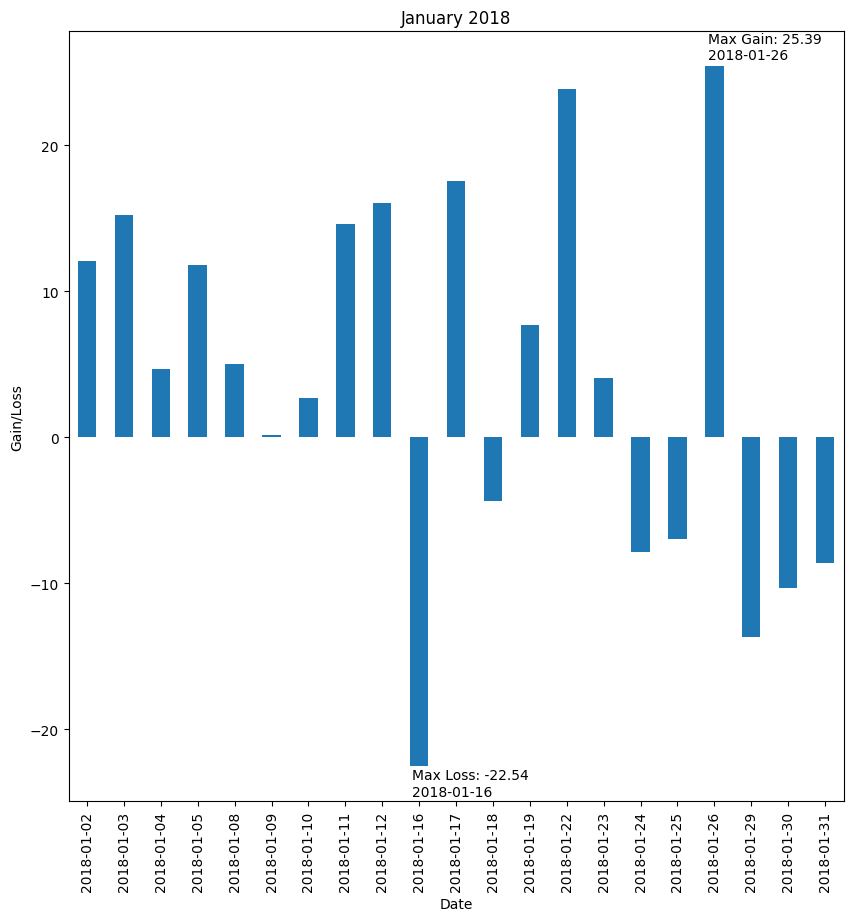

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("SP500.csv")
df_january = df[df['Date'].str.startswith('2018-01')].copy(deep=False)


df_january.loc[:, 'Gain/Loss'] = df_january['Close'] - df_january['Open']
df_january.set_index('Date', inplace=True)

ax = df_january['Gain/Loss'].plot(kind='bar', figsize=(10, 10))

plt.title('January 2018')
plt.xlabel('Date')
plt.ylabel('Gain/Loss')

max_gain = df_january['Gain/Loss'].max()
max_gain_date = df_january['Gain/Loss'].idxmax()
max_loss = df_january['Gain/Loss'].min()
max_loss_date = df_january['Gain/Loss'].idxmin()

for p in ax.patches:
    if p.get_height() == max_gain:
        ax.annotate("Max Gain: " + str(p.get_height().round(2)) + "\n" + max_gain_date,
                    (p.get_x() * 1.005, p.get_height() + 0.5))

    if p.get_height() == max_loss:
        ax.annotate("Max Loss: " + str(p.get_height().round(2)) + "\n" + max_loss_date,
                    (p.get_x() * 1.005, p.get_height() - 2))

plt.show()


#### 8. Make pair plot matrix of January 2018 SP500 data on high, low, adj close and volumn

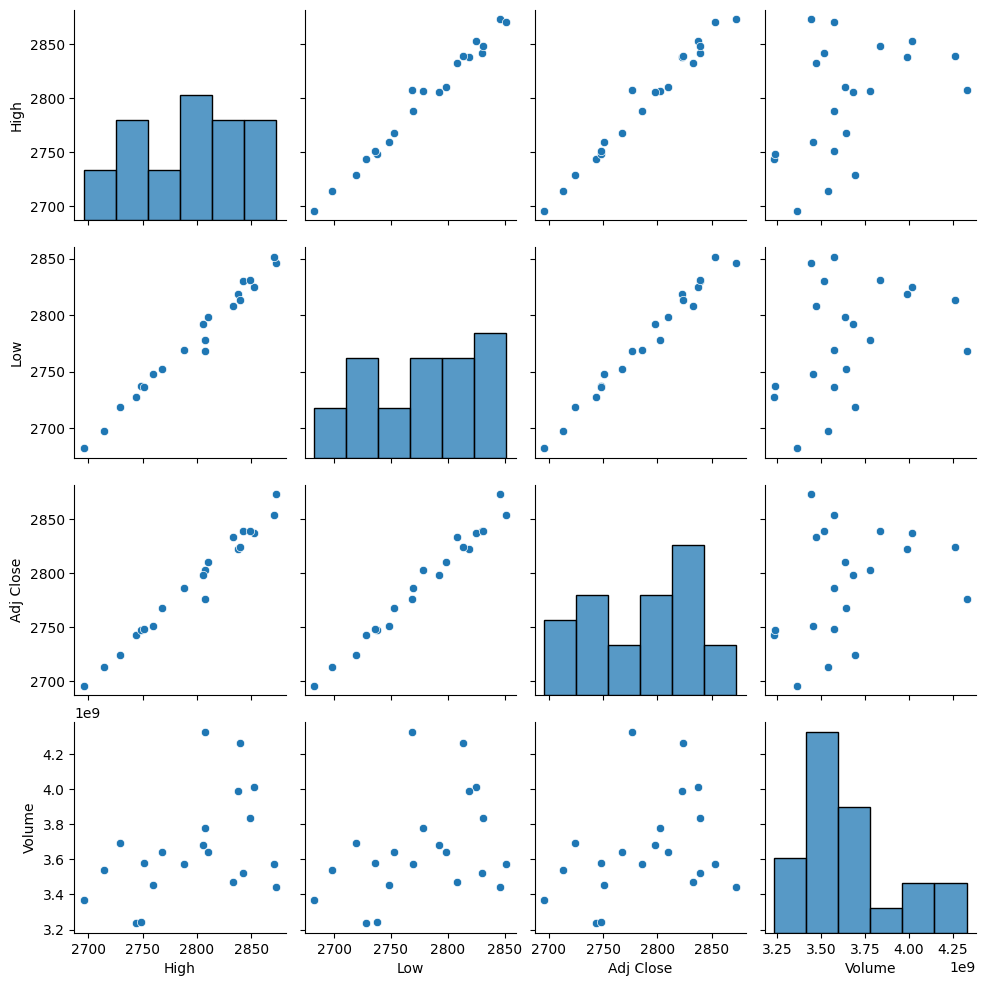

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("SP500.csv")
df_january = df[df['Date'].str.startswith('2018-01')].copy(deep=False)

data = df_january[['High', 'Low', 'Adj Close', 'Volume']]

sns.pairplot(data)
plt.show()
